In [65]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import multi_gpu_model
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [3]:
image_datas = glob(r'C:\Users\cw\Desktop\AI_School\Warming_Up_Project\2_AI_Project_200910_200923\1_data\1\img\img/*/*.jpg')  
image_datas

['C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000001.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000002.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000003.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000004.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000005.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\\img\\1981_Graphic_Ringer_Tee\\img_00000007.jpg',
 'C:\\Users\\cw\\Desktop\\AI_School\\Warming_Up_Project\\2_AI_Project_200910_200923\\1_data\\1\\img\

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\cw\oht_my_god/oht_my_god_data_table.csv')
df

image_name  category_label  \
0        img/Sheer_Pleated-Front_Blouse/img_00000009.jpg               3   
1        img/Sheer_Pleated-Front_Blouse/img_00000016.jpg               3   
2        img/Sheer_Pleated-Front_Blouse/img_00000040.jpg               3   
3        img/Sheer_Pleated-Front_Blouse/img_00000127.jpg               3   
4                img/Sheer_Woven_Blouse/img_00000006.jpg               3   
...                                                  ...             ...   
41138  img/Paisley_Print_Babydoll_Dress/img_00000050.jpg              41   
41139  img/Paisley_Print_Babydoll_Dress/img_00000051.jpg              41   
41140  img/Paisley_Print_Babydoll_Dress/img_00000052.jpg              41   
41141  img/Paisley_Print_Babydoll_Dress/img_00000053.jpg              41   
41142  img/Paisley_Print_Babydoll_Dress/img_00000054.jpg              41   

      category_name texture_1 texture_2   style_1 style_2  
0            Blouse  abstract         0  feminine       0  
1            Blouse   graphic         0    unique       0  
2            Blouse      camo         0     basic       0  
3            Blouse   stripes         0     dandy       0  
4            Blouse       dot         0  feminine       0  
...             ...       ...       ...       ...     ...  
41138         Dress   graphic   pattern  feminine       0  
41139         Dress   pattern         0      boho       0  
41140         Dress   pattern         0  feminine       0  
41141         Dress   graphic   pattern  feminine       0  
41142         Dress   pattern         0  feminine       0  

[41143 rows x 7 columns]

In [5]:
image_name = []
for i in range(len(df.index)):
    image_name.append(df.iloc[i,0])

In [6]:
new_image_name = []
for i in image_name:
    new = "C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/" + i
    new_image_name.append(new)
print(new_image_name)        

['C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000009.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000016.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000040.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000127.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Woven_Blouse/img_00000006.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Woven_Blouse/img_00000020.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Woven_Blouse/img_00000031.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_P

In [7]:
df['image_name'] = new_image_name
df

image_name  category_label  \
0      C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   
1      C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   
2      C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   
3      C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   
4      C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   
...                                                  ...             ...   
41138  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...              41   
41139  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...              41   
41140  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...              41   
41141  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...              41   
41142  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...              41   

      category_name texture_1 texture_2   style_1 style_2  
0            Blouse  abstract         0  feminine       0  
1            Blouse   graphic         0    unique       0  
2            Blouse      camo         0     basic       0  
3            Blouse   stripes         0     dandy       0  
4            Blouse       dot         0  feminine       0  
...             ...       ...       ...       ...     ...  
41138         Dress   graphic   pattern  feminine       0  
41139         Dress   pattern         0      boho       0  
41140         Dress   pattern         0  feminine       0  
41141         Dress   graphic   pattern  feminine       0  
41142         Dress   pattern         0  feminine       0  

[41143 rows x 7 columns]

In [21]:
df.to_csv('oht_my_god_data_table_final.csv')

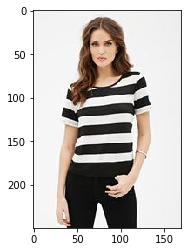

In [8]:
# 이미지 파일 확인해보기
img_2 = Image.open(image_datas[2])
plt.imshow(img_2)

In [9]:
# 각 특성별 인자 리스트 만들기 --- 이미지 파일 이름이 담긴 리스트 만들기 위함 ( 예시: abstract = [img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,...,img/Paisley_Cami_Trapeze_Dress/img_00000027.jpg])
texture_list = ['abstract','camo','cheveron','dot','floral','graphic','plaid','leopard','stripes','pattern','none']
style_list = ['dandy', 'cute', 'sexy', 'feminine', 'tough', 'active','boho', 'chic', 'basic', 'unique']
category_list = ['Blazer','Blouse','Bomber','Button_Down','Cardigan','Flannel','Halter','Henley','Hoodie','Jacket','Jersey','Parka','Peacoat','Poncho','Sweater','Tank','Tee','Top','Turtleneck','Capris','Chinos','Culottes','Cutoffs','Jeans','Jeggings','Joggers','Leggings','Shorts']

attr_list = ['abstract','camo','cheveron','dot','floral','graphic','plaid','leopard','stripes','pattern','none','dandy', 'cute', 'sexy', 'feminine', 'tough', 'active', 'chic', 'basic', 'unique', 'Blazer','Blouse','Bomber','Button_Down','Cardigan','Flannel','Halter','Henley','Hoodie','Jacket','Jersey','Parka','Peacoat','Poncho','Sweater','Tank','Tee','Top','Turtleneck','Capris','Chinos','Culottes','Cutoffs','Jeans','Jeggings','Joggers','Leggings','Shorts']

In [10]:
# 이미지 이름들을 담기 위한 빈 리스트 생성

texture_list_all = []
for i in range(len(texture_list)):
    globals()['{}_img_name_list'.format(i)] = []
    texture_list_all.append(globals()['{}_img_name_list'.format(i)])

style_list_all = []
for i in range(len(style_list)):
    globals()['{}_img_name_list'.format(i)] = []
    style_list_all.append(globals()['{}_img_name_list'.format(i)])

category_list_all = []
for i in range(len(category_list)):
    globals()['{}_img_name_list'.format(i)] = []
    category_list_all.append(globals()['{}_img_name_list'.format(i)])

In [11]:
# texture 특성 이미지 이름 리스트 만들기
for i in range(len(texture_list)):
    new_index = []
    globals()['texture_{}'.format(i)] = df[(df['texture_1'] == texture_list[i]) | (df['texture_2'] == texture_list[i])]
    for j in range(len(globals()['texture_{}'.format(i)])):
        new_index.append(j)
    globals()['texture_{}'.format(i)].index = new_index
    for k in range(len(globals()['texture_{}'.format(i)])):
        texture_list_all[i].append(globals()['texture_{}'.format(i)]['image_name'][k])

In [12]:
abstract = texture_list_all[0]
camo = texture_list_all[1]
cheveron = texture_list_all[2]
dot = texture_list_all[3]
floral = texture_list_all[4]
graphic = texture_list_all[5]
plaid = texture_list_all[6]
leopard = texture_list_all[7]
stripes = texture_list_all[8]
pattern = texture_list_all[9]
none = texture_list_all[10]

In [13]:
print(abstract)      # texture의 0번째 인자(=abstract)의 이미지 파일 이름들
print(len(abstract)) # texture의 0번째 인자(=abstract)의 이미지 파일 개수 = 2929

['C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000009.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Shirred_Lace-Paneled_Blouse/img_00000082.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Side-Slit_Collared_Blouse/img_00000047.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sleeveless_Vented_Blouse/img_00000064.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Slub_Knit_Buttoned-Back_Blouse/img_00000009.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Slub_Knit_Buttoned-Back_Blouse/img_00000123.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Boxy_Split-Neck_Blouse/img_00000087.jpg', 'C:/Users/cw/Desk

In [14]:
# style 특성 이미지 이름 리스트 만들기
for i in range(len(style_list)):
    new_index = []
    globals()['style_{}'.format(i)] = df[(df['style_1'] == style_list[i]) | (df['style_2'] == style_list[i])]
    for j in range(len(globals()['style_{}'.format(i)])):
        new_index.append(j)
    globals()['style_{}'.format(i)].index = new_index
    for k in range(len(globals()['style_{}'.format(i)])):
        style_list_all[i].append(globals()['style_{}'.format(i)]['image_name'][k])

In [15]:
dandy = style_list_all[0]
cute = style_list_all[1]
sexy = style_list_all[2]
feminine = style_list_all[3]
tough = style_list_all[4]
active = style_list_all[5]
boho = style_list_all[6]
chic = style_list_all[7]
basic = style_list_all[8]
unique  = style_list_all[9]

In [16]:
print(dandy)      # style의 0번째 인자(=dandy)의 이미지 파일 이름들
print(len(dandy)) # style의 0번째 인자(=dandy)의 이미지 파일 개수 = 2370

['C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Pleated-Front_Blouse/img_00000127.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Sheer_Woven_Blouse/img_00000031.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Shirred_Floral-Embroidered_Blouse/img_00000050.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Shirred_Lace-Paneled_Blouse/img_00000002.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Side-Slit_Collared_Blouse/img_00000005.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Side-Slit_Collared_Blouse/img_00000007.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Side-Slit_Collared_Blouse/img_00000068.jpg', 'C:/Users/cw/Desktop/A

In [17]:
# category 특성 이미지 이름 리스트 만들기
for i in range(len(category_list)):
    new_index = []
    globals()['category_{}'.format(i)] = df[df['category_name'] == category_list[i]]
    for j in range(len(globals()['category_{}'.format(i)])):
        new_index.append(j)
    globals()['category_{}'.format(i)].index = new_index
    for k in range(len(globals()['category_{}'.format(i)])):
        category_list_all[i].append(globals()['category_{}'.format(i)]['image_name'][k])    

In [18]:
Blazer = category_list_all[0]
Blouse = category_list_all[1]
Bomber = category_list_all[2]
Button_Down = category_list_all[3]
Cardigan = category_list_all[4]
Flannel = category_list_all[5]
Halter = category_list_all[6]
Henley = category_list_all[7]
Hoodie = category_list_all[8]
Jacket = category_list_all[9]
Jersey = category_list_all[10]
Parka = category_list_all[11]
Peacoat = category_list_all[12]
Poncho = category_list_all[13]
Sweater = category_list_all[14]
Tank = category_list_all[15]
Tee = category_list_all[16]
Top = category_list_all[17]
Turtleneck = category_list_all[18]
Capris = category_list_all[19]
Chinos = category_list_all[20]
Culottes = category_list_all[21]
Cutoffs = category_list_all[22]
Jeans = category_list_all[23]
Jeggings = category_list_all[24]
Joggers = category_list_all[25]
Leggings = category_list_all[26]
Shorts = category_list_all[27]

In [19]:
print(Blazer)      # category의 0번째 인자(=Blazer)의 이미지 파일 이름들
print(len(Blazer)) # category의 0번째 인자(=Blazer)의 이미지 파일 개수 = 500

['C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Single-Button_Blazer/img_00000029.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000004.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000048.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000073.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000097.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000102.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_Project_200910_200923/1_data/1/img/img/Tailored_Woven_Blazer/img_00000105.jpg', 'C:/Users/cw/Desktop/AI_School/Warming_Up_Project/2_AI_

In [30]:
# abstract[0]
df[df['image_name'] == abstract[0]]

image_name  category_label  \
0  C:/Users/cw/Desktop/AI_School/Warming_Up_Proje...               3   

  category_name texture_1 texture_2   style_1 style_2  
0        Blouse  abstract         0  feminine       0

이미지 학습시키기

1. texture 학습

In [31]:
# texture_list = ['abstract','camo','cheveron','dot','floral','graphic','plaid','leopard','stripes','pattern','none']
# style_list = ['dandy', 'cute', 'sexy', 'feminine', 'tough', 'active','boho', 'chic', 'basic', 'unique']
# category_list = ['Blazer','Blouse','Bomber','Button_Down','Cardigan','Flannel','Halter','Henley','Hoodie','Jacket','Jersey','Parka','Peacoat','Poncho','Sweater','Tank','Tee','Top','Turtleneck','Capris','Chinos','Culottes','Cutoffs','Jeans','Jeggings','Joggers','Leggings','Shorts']
dic_texture = {'abstract' : 0,'camo': 1,'cheveron' :2,'dot' : 3,'floral' : 4,'graphic' : 5,'plaid' : 6,'leopard' : 7,'stripes' : 8,'pattern' : 9,'none' : 10}
textures = [abstract,camo,cheveron,dot,floral,graphic,plaid,leopard,stripes,pattern,none] # [ [], [], [], [] ]
X = []
Y = []
for i in range(len(textures)): # range(11)
#     for imagename in textures:
    for j in textures[i]: #textures 내부의 0번 ~ 10번 리스트를 하나 선택, i번의 리스트 안의 값들을 j로 할당해 넣어준다.
        image = Image.open(j)
        image = image.resize((128,128))
        image = np.array(image)
        X.append(image)
        
        label = texture_list[i]
        label = dic_texture[label]
        Y.append(label)

In [34]:
X = np.array(X)
Y = np.array(Y)

In [37]:
texture_train_images, texture_test_images, texture_train_labels, texture_test_labels = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=44)

texture_train_labels = texture_train_labels[..., tf.newaxis]
texture_test_labels = texture_test_labels[..., tf.newaxis]

texture_train_images.shape, texture_train_labels.shape, texture_test_images.shape, texture_test_labels.shape

((44438, 128, 128, 3), (44438, 1), (4938, 128, 128, 3), (4938, 1))

In [40]:
# training set의 각 class별 imgage 수 확인
texture_unique, texture_counts = np.unique(np.reshape(texture_train_labels, (44438,)), axis=-1, return_counts=True)
dict(zip(texture_unique, texture_counts))

{0: 2647,
 1: 251,
 2: 421,
 3: 1690,
 4: 8292,
 5: 18946,
 6: 176,
 7: 474,
 8: 5554,
 9: 3037,
 10: 2950}

In [42]:
# test set의 각 class별 imgage 수 확인
texture_unique, texture_counts = np.unique(np.reshape(texture_test_labels, (4938,)), axis=-1, return_counts=True)
dict(zip(texture_unique, texture_counts))

{0: 282,
 1: 34,
 2: 36,
 3: 195,
 4: 896,
 5: 2117,
 6: 23,
 7: 52,
 8: 615,
 9: 356,
 10: 332}

In [44]:
texture_N_TRAIN = texture_train_images.shape[0]
texture_N_TEST = texture_test_images.shape[0]

In [46]:
# Data 확인
plt.figure(figsize=(15,9))
for i in range(15):
    img_idx = np.random.randint(0, 44438)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(texture_train_images[img_idx])
    plt.xlabel(textures[texture_train_labels[img_idx][0]])

ValueError: Image size of 15667555x518 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x648 with 15 Axes>

In [48]:
texture_train_images = texture_train_images / 255.0
texture_test_images = texture_test_images / 255.0

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (128,128,3)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='softmax')
])

In [83]:
# model = keras.utils.multi_gpu_model(model,gpus=1)
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6291584   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,291,713
Trainable params: 6,291,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(texture_train_images,texture_train_labels,
                    epochs = 500, 
                    batch_size = 512,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
66/66 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0057

2. style 학습

In [32]:
dic_style = {'dandy' : 0, 'cute' : 1, 'sexy' : 2, 'feminine' : 3, 'tough' : 4, 'active' : 5,'boho' : 6, 'chic' : 7, 'basic' : 8, 'unique' : 9}
styles = [dandy, cute, sexy, feminine, tough, active,boho, chic, basic, unique] # [ [], [], [], [] ]
S = []
T = []
for i in range(len(styles)): # range(10)
    for j in styles[i]: #textures 내부의 0번 ~ 9번 리스트를 하나 선택, i번의 리스트 안의 값들을 j로 할당해 넣어준다.
        image = Image.open(j)
        image = image.resize((128,128))
        image = np.array(image)
        S.append(image)
        
        label = style_list[i]
        label = dic_style[label]
        T.append(label)

In [35]:
S = np.array(S)
T = np.array(T)

In [38]:
style_train_images, style_test_images, style_train_labels, style_test_labels = train_test_split(S, T, test_size=0.1, shuffle=True, random_state=44)

style_train_labels = style_train_labels[..., tf.newaxis]
style_test_labels = style_test_labels[..., tf.newaxis]

style_train_images.shape, style_train_labels.shape, style_test_images.shape, style_test_labels.shape

((42129, 128, 128, 3), (42129, 1), (4681, 128, 128, 3), (4681, 1))

3. category 학습

In [33]:
dic_category = {'Blazer' : 0,'Blouse' : 1,'Bomber' : 2,'Button_Down' : 3,'Cardigan' : 4,'Flannel' : 5,'Halter' : 6,'Henley' : 7,'Hoodie' : 8,'Jacket' : 9,'Jersey' : 10,'Parka' : 11,'Peacoat' : 12,'Poncho' : 13,'Sweater' : 14,'Tank' : 15,'Tee' : 16,'Top' : 17,'Turtleneck' : 18,'Capris' : 19,'Chinos' : 20,'Culottes' : 21,'Cutoffs' : 22,'Jeans' : 23,'Jeggings' : 24,'Joggers' : 25,'Leggings' : 26,'Shorts' : 27}
categorys = [Blazer,Blouse,Bomber,Button_Down,Cardigan,Flannel,Halter,Henley,Hoodie,Jacket,Jersey,Parka,Peacoat,Poncho,Sweater,Tank,Tee,Top,Turtleneck,Capris,Chinos,Culottes,Cutoffs,Jeans,Jeggings,Joggers,Leggings,Shorts] # [ [], [], [], [] ]
C = []
A = []
for i in range(len(categorys)): # range(10)
    for j in categorys[i]: #textures 내부의 0번 ~ 9번 리스트를 하나 선택, i번의 리스트 안의 값들을 j로 할당해 넣어준다.
        image = Image.open(j)
        image = image.resize((128,128))
        image = np.array(image)
        C.append(image)
        
        label = category_list[i]
        label = dic_category[label]
        A.append(label)

In [36]:
C = np.array(C)
A = np.array(A)

In [39]:
category_train_images, category_test_images, category_train_labels, category_test_labels = train_test_split(C, A, test_size=0.1, shuffle=True, random_state=44)

category_train_labels = category_train_labels[..., tf.newaxis]
category_test_labels = category_test_labels[..., tf.newaxis]

category_train_images.shape, category_train_labels.shape, category_test_images.shape, category_test_labels.shape

((22049, 128, 128, 3), (22049, 1), (2450, 128, 128, 3), (2450, 1))